In [10]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import matplotlib.patheffects as PathEffects

In [2]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc' #ARS
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU
#~~~~ ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#~~~~ ds peak
dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
dpeak.close()

ds = dpeak
ds.close()
ds

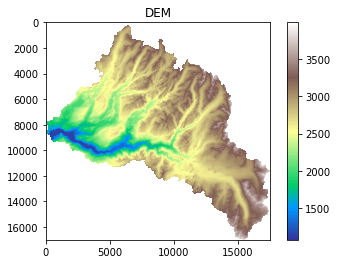

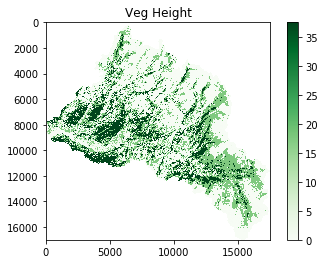

In [5]:
plt.imshow(ds.dem, cmap='terrain'); plt.colorbar(); plt.title('DEM'); plt.show()
plt.imshow(ds.veg, cmap='Greens'); plt.colorbar(); plt.title('Veg Height'); plt.show()

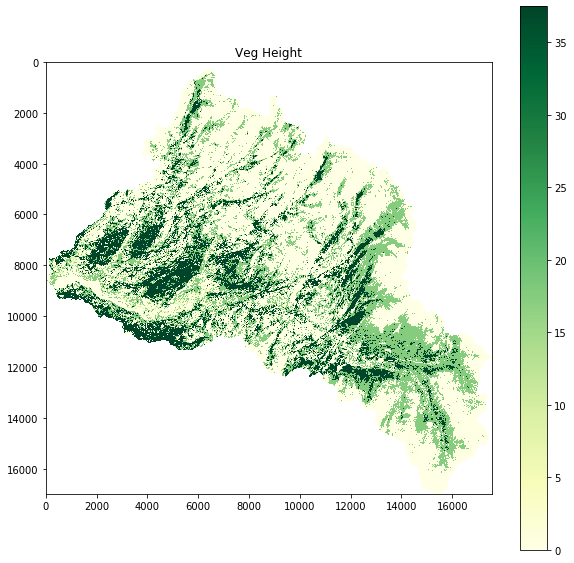

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(ds.veg, cmap='YlGn'); plt.colorbar(); plt.title('Veg Height')
# plt.imshow(ds.dem >= 2850)
plt.show()

In [ ]:
dveg = ds.veg